In [53]:
# imports
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
from matplotlib.animation import FuncAnimation

import cleaner
import filter

In [2]:
def clean_dict(ddict, verbose=False):
    for train_type in ddict:
        if "left" in train_type or "right" in train_type:
            for folder in ddict[train_type]:
                ddict[train_type][folder] = cleaner.clean_acc(ddict[train_type][folder])
                if verbose:
                    print("cleaned", train_type, folder)
        elif "t_gps" in train_type:
            for folder in ddict[train_type]:
                ddict[train_type][folder] = cleaner.clean_gps(ddict[train_type][folder])
                if verbose:
                    print("cleaned", train_type, folder)
    return ddict

In [ ]:
data_dict = clean_dict(cleaner.load_data())

In [34]:
cleaner.print_structure(data_dict)

 train
	 t_gps
		 PVS 1
		 PVS 2
		 PVS 3
		 PVS 4
		 PVS 5
		 PVS 6
		 PVS 7
		 PVS 8
		 PVS 9
	 gps_mpu_left
		 PVS 1
		 PVS 2
		 PVS 3
		 PVS 4
		 PVS 5
		 PVS 6
		 PVS 7
		 PVS 8
		 PVS 9
	 gps_mpu_right
		 PVS 1
		 PVS 2
		 PVS 3
		 PVS 4
		 PVS 5
		 PVS 6
		 PVS 7
		 PVS 8
		 PVS 9
	 labels
		 PVS 1
		 PVS 2
		 PVS 3
		 PVS 4
		 PVS 5
		 PVS 6
		 PVS 7
		 PVS 8
		 PVS 9
	 folders
 val
	 t_gps
	 gps_mpu_left
	 gps_mpu_right
	 labels
	 folders
 test
	 t_gps
	 gps_mpu_left
	 gps_mpu_right
	 labels
	 folders


NameError: name 'HTML' is not defined

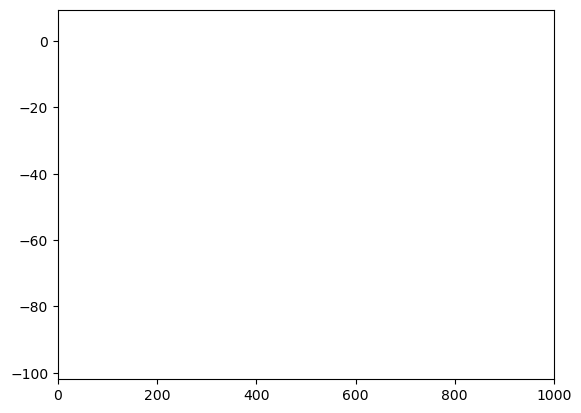

In [56]:
def animate(data,  title="data.mp4", sample_rate=1, window_size=1000, start=0, end=None, speed=1):
    """
    Create an animation scrolling through the data.

    Parameters
    ----------
    data : dict
        The data to scroll through.
    title : str, optional
        The title of the animation. The default is "data".
    sample_rate : int, optional
        The sample rate of the data. The default is 1.
    window_size : int, optional
        The size of the window to display. The default is 1000.
    start : int, optional
        The start index of the window. The default is 0.
    end : int, optional
        The end index of the window. The default is None.
    speed : int, optional
        The speed of the animation. The default is 1.
    """
    # error handling
    if end is None or len(data) < end < start or end < 0:
        end = len(data)
    if start < 0:
        start = 0
    if window_size < 100:
        window_size = 100
    if speed < 1:
        speed = 1
    if sample_rate < 1:
        sample_rate = 1
    
    # create the animation
    fig, ax = plt.subplots()
    ax.set_xlim(start, start + window_size)
    ax.set_ylim(min(data)*09.5, max(data)*1.05)
    line, = ax.plot([], [], lw=2)

    def init():
        line.set_data([], [])
        return line,

    def update(frame):
        x = np.arange(start + frame * speed, start + frame * speed + window_size)
        y = data[x]
        line.set_data(x, y)
        return line,

    frames = int((end - start - window_size) / speed)
    ani = FuncAnimation(fig, update, frames=frames, init_func=init, blit=True)
    ani.save(title)
    HTML(ani.to_html5_video())

# animate the acceleration
acc = data_dict["train"]["gps_mpu_left"]["PVS 1"]["acc_x_dashboard"]
animate(acc, title="pvs1_acc_xd.mp4")